### Media/News Bias Detection using Machine Learning
+ Predicting the presence of bias in news and media
+ Predicting political ideologies based on left-right political spectrum


#### Terms
+ Generally, the left-wing is characterized by an emphasis on "ideas such as freedom, equality, fraternity, rights, progress, reform and internationalism" while the right-wing is characterized by an emphasis on "notions such as authority, hierarchy, order, duty, tradition, reaction and nationalism".[19]

Political scientists and other analysts regard 
The left as including 
   + anarchists, 
   + communists, 
   + socialists, 
   + democratic socialists, 
   + social democrats
   + left-libertarians, 
   + progressives and social liberals.
   + Movements for racial equality

The right as including 
   + conservatives, 
   + right-libertarians,
   + anarcho-capitalists,
   + neoconservatives,
   + imperialists,
   + monarchists,
   + fascists
   + reactionaries
   + traditionalists
   

#### Dataset & Credit
+ https://media-bias-research.org/
+ https://github.com/Media-Bias-Group/Neural-Media-Bias-Detection-Using-Distant-Supervision-With-BABE


# Interpreting Machine Learning Models In Python
+ Eli5
+ Shap
+ Lime
+ InterpretML
+ Dalex


In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.dummy import DummyClassifier

In [3]:
## Load Dataset
df = pd.read_csv("data/final_labels_MBIC.csv",sep=";")

In [4]:
df.head()

text  \
0  YouTube is making clear there will be no “birt...   
1  So while there may be a humanitarian crisis dr...   
2  Looking around the United States, there is nev...   
3  The Republican president assumed he was helpin...   
4  The explosion of the Hispanic population has l...   

                                           news_link      outlet  \
0  https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1  https://www.alternet.org/2019/01/here-are-5-of...    alternet   
2  https://thefederalist.com/2020/03/11/woman-who...  federalist   
3  http://www.msnbc.com/rachel-maddow-show/auto-i...       msnbc   
4  https://www.breitbart.com/politics/2015/02/26/...   breitbart   

            topic    type  group_id  num_sent label_bias  \
0  elections-2020  center         1         1     Biased   
1     immigration    left         1         1     Biased   
2        abortion   right         1         1     Biased   
3     environment    left         1         1     Biased   
4    student-debt   right         1         1     Biased   

                           label_opinion  \
0  Somewhat factual but also opinionated   
1             Expresses writer’s opinion   
2  Somewhat factual but also opinionated   
3             Expresses writer’s opinion   
4                           No agreement   

                                             article  \
0  YouTube says no ‘deepfakes’ or ‘birther’ video...   
1  Speaking to the country for the first time fro...   
2  The left has a thing for taking babies hostage...   
3  In Barack Obama’s first term, the administrati...   
4  Republicans should stop fighting amnesty, Pres...   

                                        biased_words  
0                          ['belated', 'birtherism']  
1                                         ['crisis']  
2  ['killing', 'never', 'developing', 'humans', '...  
3                    ['rejects', 'happy', 'assumed']  
4                                      ['explosion']

<AxesSubplot:xlabel='label_bias', ylabel='count'>

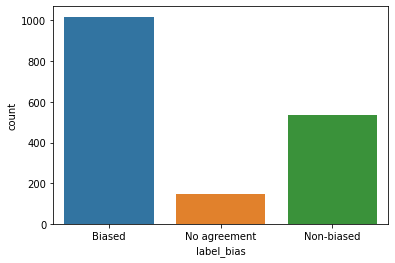

In [5]:
# Class Distribution
sns.countplot(x="label_bias",data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

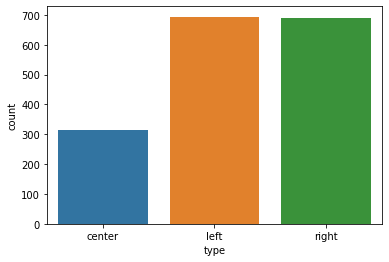

In [6]:
# Class Distribution
sns.countplot(x="type",data=df)

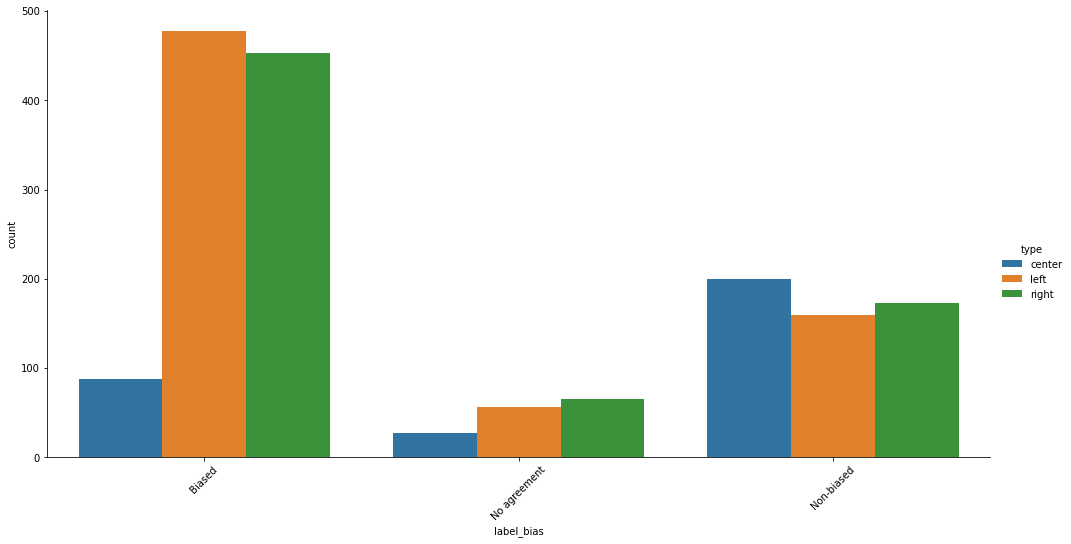

In [7]:
### Check Distribution of Label Bias vs Political Type
sns.catplot(x="label_bias",hue="type",kind="count",data=df,height=7,aspect=2)
plt.xticks(rotation=45)
plt.show()

### Text Preprocessing

In [9]:
import neattext.functions as nfx

In [10]:
df["article"] = df["article"].fillna("Unknown")
df["document"] = df["text"] + df["article"]

df["clean_document"] = df["document"].apply(lambda x: nfx.remove_special_characters(nfx.remove_stopwords(str(x).lower())))

#

In [59]:
# Initialize
vec = CountVectorizer()
lr = LogisticRegression()

In [60]:
# Features & Labels
Xfeatures = df['clean_document']
ylabels = df['type']

In [65]:
#Split Dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)


In [66]:
# Vectorize the Text
x_train = vec.fit_transform(x_train).toarray()


In [67]:
# Use Vectorizer to transform the Test Data to prevent data leakage
x_test = vec.transform(x_test)


In [68]:
# Build Model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [69]:
# Model Accuracy
lr_model.score(x_test,y_test)

0.8705882352941177

In [70]:
# Model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
y_pred = lr_model.predict(x_test)


In [71]:
# Confusion Matrix : true pos,false pos,etc
confusion_matrix(y_pred,y_test)


array([[ 73,   6,   6],
       [  6, 188,  16],
       [ 15,  17, 183]])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


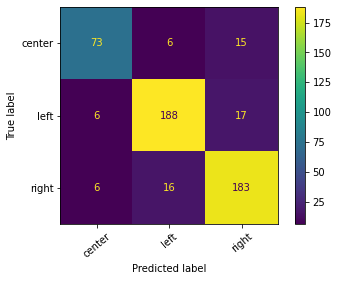

In [72]:
plot_confusion_matrix(lr_model,x_test,y_test,xticks_rotation=40)

In [25]:
# Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      center       0.78      0.86      0.82        85
        left       0.89      0.90      0.89       210
       right       0.89      0.85      0.87       215

    accuracy                           0.87       510
   macro avg       0.85      0.87      0.86       510
weighted avg       0.87      0.87      0.87       510



In [73]:
# Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      center       0.78      0.86      0.82        85
        left       0.89      0.90      0.89       210
       right       0.89      0.85      0.87       215

    accuracy                           0.87       510
   macro avg       0.85      0.87      0.86       510
weighted avg       0.87      0.87      0.87       510



### Make Prediction
+ vectorize
+ predict

In [74]:
def vectorize_text(text):
    my_vec = vec.transform([text])
    return my_vec.toarray()

In [75]:
ex1 = "A Frontier Airlines flight was forced to make an emergency landing on Friday evening in Atlanta, Ga., after a passenger was found with a box cutter.'"

In [76]:
sample1 = vectorize_text(ex1)
lr_model.predict(sample1)

array(['center'], dtype=object)

In [262]:
### WordCloud

In [280]:
# Remove stopwords
df["document_clean"] = df["document"].apply(lambda x: nfx.remove_stopwords(x.lower()))

In [263]:
from wordcloud import WordCloud
from collections import Counter

In [281]:
center_docx = ' '.join(df[df["type"] == "center"]["document_clean"].to_list())
right_docx = ' '.join(df[df["type"] == "right"]["document_clean"].to_list())
left_docx = ' '.join(df[df["type"] == "left"]["document_clean"].to_list())

In [271]:
 def plot_most_common_tokens(text, num=10):
        word_freq = Counter(text.split())
        most_common_tokens = word_freq.most_common(num)
        x, y = zip(*most_common_tokens)
        fig = plt.figure(figsize=(20, 10))
        plt.bar(x, y)
        plt.title("Most Common Tokens")
        plt.xticks(rotation=45)
        plt.show()

def plot_wordcloud(text):
        plt.figure(figsize=(20, 10))
        mywordcloud = WordCloud().generate(text)
        plt.imshow(mywordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show(block=True)

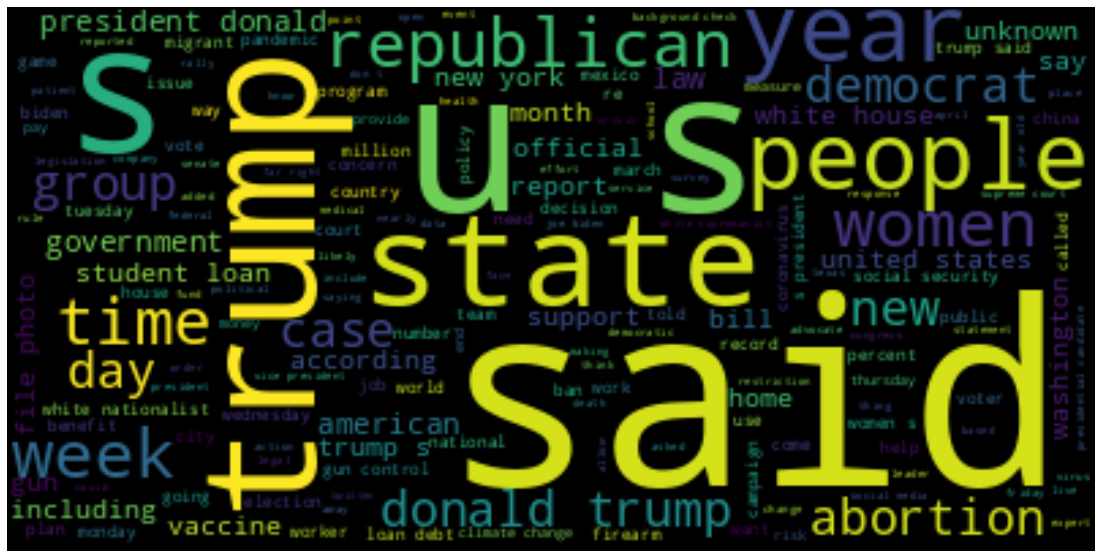

In [282]:
# Wordcloud for Political Spectrum Center
plot_wordcloud(center_docx)

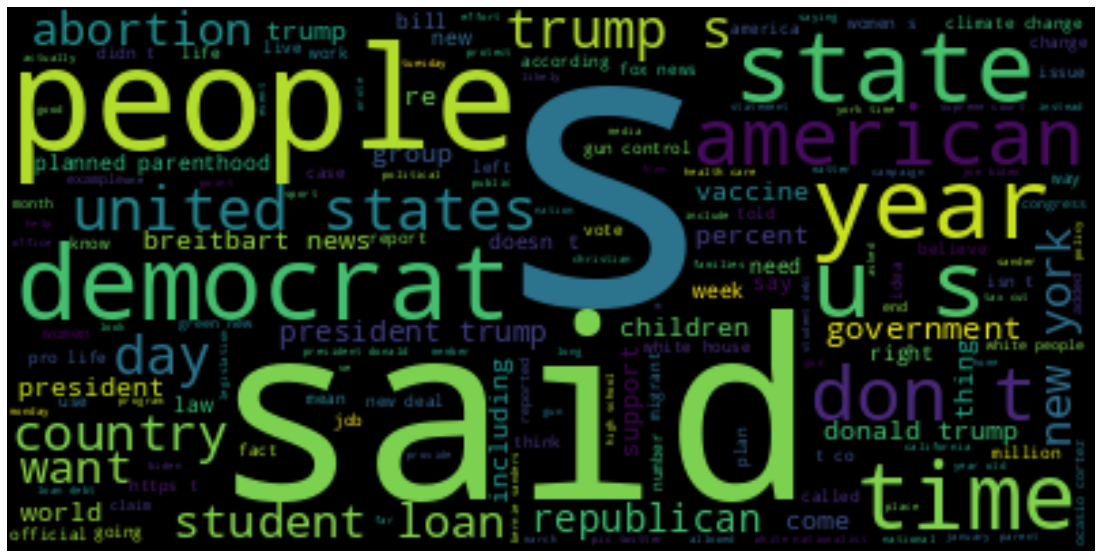

In [283]:
# Wordcloud for Political Spectrum Center
plot_wordcloud(right_docx)

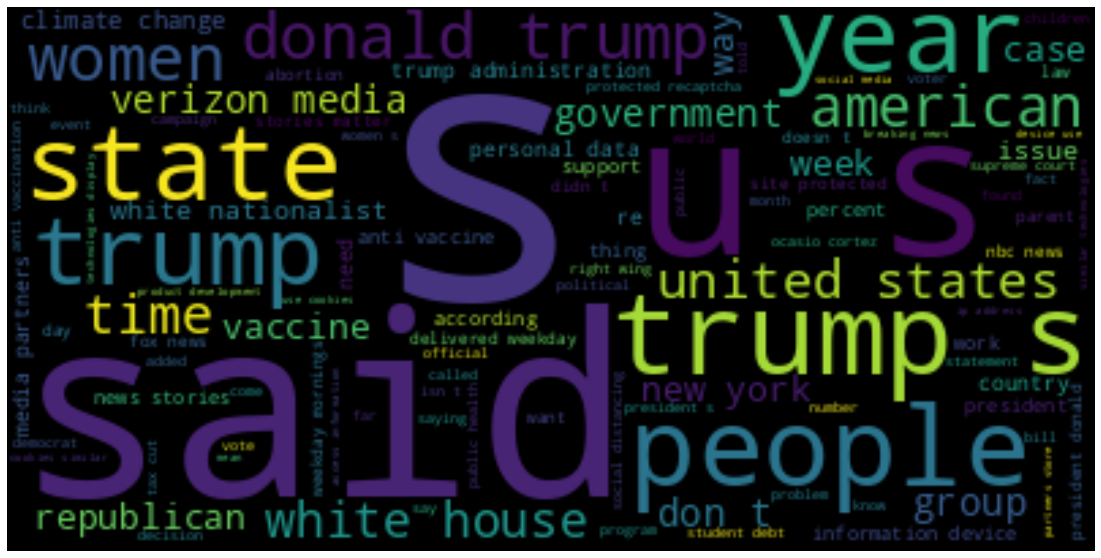

In [284]:
# Wordcloud for Political Spectrum Center
plot_wordcloud(left_docx)

### Model Interpretation
+ Eli5

In [31]:
import eli5

In [77]:
# Show Weights
eli5.show_weights(lr_model)

In [78]:
# Show Weights with Meaning
eli5.show_weights(lr_model,vec=vec)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [79]:
# Show Interpetation for Prediction
eli5.show_prediction(lr_model,ex1,vec=vec)

In [80]:
# target names
class_names = ylabels.unique().tolist()

In [81]:
# Show Interpetation for Prediction
eli5.show_prediction(lr_model,ex1,vec=vec,target_names=class_names)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


### Text Classification With Deep Learning

In [102]:
import tensorflow as tf
from tensorflow import keras

print("Keras Version : {}".format(keras.__version__))

Keras Version : 2.9.0


In [103]:
## Load Dataset
df = pd.read_csv("data/final_labels_MBIC.csv",sep=";")

In [104]:
df["article"] = df["article"].fillna("Unknown")
df["document"] = df["text"] + df["article"]

In [128]:
label_dict = {v:k for k,v in enumerate(df["type"].unique())}

In [174]:
label_dict

{'center': 0, 'left': 1, 'right': 2}

In [129]:
Xfeatures = df["document"]
ylabels = df["type"].map(label_dict)

In [130]:
#Split Dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)


In [131]:
# Using Tensorflow TextVectorizer
text_vectorizer = keras.layers.TextVectorization(max_tokens=None, standardize="lower_and_strip_punctuation",
                                                 split="whitespace", output_mode="count")


In [132]:
text_vectorizer

In [133]:
# Adapt to fit on data
text_vectorizer.adapt(x_train, batch_size=512)

In [134]:
vocab = text_vectorizer.get_vocabulary()
print("Vocab : {}".format(vocab[:10]))
print("Vocab Size : {}".format(text_vectorizer.vocabulary_size()))

Vocab : ['[UNK]', 'the', 'to', 'of', 'and', 'a', 'in', 'that', 'for', 'is']
Vocab Size : 35324


In [ ]:
text_vectorizer = keras.layers.TextVectorization(max_tokens=50000, standardize="lower_and_strip_punctuation",
                                                 split="whitespace", output_mode="count", pad_to_max_tokens=True)

text_vectorizer.adapt(np.concatenate((X_train, X_test)), batch_size=512)

vocab = text_vectorizer.get_vocabulary()
print("Vocab : {}".format(vocab[:10]))
print("Vocab Size : {}".format(text_vectorizer.vocabulary_size()))

In [135]:
# Load DL Pkgs
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [136]:
# Get output layer
classes = np.unique(y_train)

In [173]:
classes

array([0, 1, 2])

In [137]:
# Create a DL Model

def create_model(text_vectorizer):
    return Sequential([
                        layers.Input(shape=(1,), dtype="string"),
                        text_vectorizer,
                        #layers.Dense(256, activation="relu"),
                        layers.Dense(128, activation="relu"),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(len(classes), activation="softmax"),
                    ])



In [138]:
len(classes)

3

In [139]:
model = create_model(text_vectorizer)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 35324)            0         
 ectorization)                                                   
                                                                 
 dense_8 (Dense)             (None, 128)               4521600   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,530,051
Trainable params: 4,530,051
Non-trainable params: 0
_________________________________________________________________


In [208]:
tf.keras.utils.plot_model(model,to_file=('output_filename.png'))

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [140]:
# Compile Model
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

In [141]:
# Train
history = model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 191ms/step - loss: 1.0768 - accuracy: 0.4672 - val_loss: 0.7699 - val_accuracy: 0.7059
Epoch 2/10
5/5 [==============================] - 1s 122ms/step - loss: 0.5373 - accuracy: 0.9017 - val_loss: 0.5716 - val_accuracy: 0.8333
Epoch 3/10
5/5 [==============================] - 1s 131ms/step - loss: 0.2754 - accuracy: 0.9739 - val_loss: 0.4752 - val_accuracy: 0.8392
Epoch 4/10
5/5 [==============================] - 1s 128ms/step - loss: 0.1465 - accuracy: 0.9882 - val_loss: 0.4532 - val_accuracy: 0.8490
Epoch 5/10
5/5 [==============================] - 1s 129ms/step - loss: 0.0900 - accuracy: 0.9966 - val_loss: 0.4040 - val_accuracy: 0.8647
Epoch 6/10
5/5 [==============================] - 1s 130ms/step - loss: 0.0642 - accuracy: 0.9966 - val_loss: 0.3993 - val_accuracy: 0.8784
Epoch 7/10
5/5 [==============================] - 1s 140ms/step - loss: 0.0502 - accuracy: 0.9966 - val_loss: 0.4163 - val_accuracy: 0.8784
Epoch 8/10
5/5 [====

In [145]:
from sklearn.metrics import accuracy_score, classification_report

train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

print("Train Accuracy : {}".format(accuracy_score(y_train, np.argmax(train_preds, axis=1))))
print("Test  Accuracy : {}".format(accuracy_score(y_test, np.argmax(test_preds, axis=1))))



16/16 [==============================] - 0s 12ms/step
Train Accuracy : 1.0
Test  Accuracy : 0.8627450980392157


In [161]:
x_train

1133    In Haiti, President Bill Clinton admitted—afte...
900     Instead of motivating kids to payback their lo...
682     It is therefore no surprise that Ocasio-Cortez...
767     Nevertheless, Trump and other Republicans have...
177     Social media users were quick to point out the...
                              ...                        
1130    Putin said last month Russia would not legaliz...
1294    WADA wants to investigate all the athletes who...
860     Donald Trump’s victory last November was not j...
1459    In Spain, hundreds of thousands of women, wear...
1126    This would be enough of a problem in normal ti...
Name: document, Length: 1190, dtype: object

In [144]:
# Classification Report
print(classification_report(y_test, np.argmax(test_preds, axis=1), target_names=label_dict.keys()))

              precision    recall  f1-score   support

      center       0.71      0.90      0.79        94
        left       0.90      0.89      0.90       211
       right       0.92      0.81      0.86       205

    accuracy                           0.86       510
   macro avg       0.84      0.87      0.85       510
weighted avg       0.87      0.86      0.86       510



In [ ]:
#### Single Prediction
def make_predictions(docx):
    docx = text_vectorizer.transform(docx).toarray()
    prediction = model.predict(docx)
    return prediction

In [157]:
ex1

"A Frontier Airlines flight was forced to make an emergency landing on Friday evening in Atlanta, Ga., after a passenger was found with a box cutter.'"

In [164]:
x_train.iloc[9]

'A 70% majority of Americans view the economy as unfairly favoring those with power, and large majorities also say politicians, giant corporations, and wealthy individuals wield too much power over the economy, according to Pew Research Center.A 70% majority of Americans view the economy as unfairly favoring those with power, and large majorities also say politicians, giant corporations, and wealthy individuals wield too much power over the economy, according to Pew Research Center.\nThe idea of a “rigged” economy that both benefits and is shaped by the rich and powerful was a popular theme in 2016 and is sure to play a big role again this cycle with several Democratic candidates emphasizing it on the campaign trail. It’s a particularly good focal point too because Pew found it resonates across income groups, including 66% of upper-income individuals, 69% of middle-income folks, and 73% of lower-income adults.\nFrom a partisan standpoint, however, the issue plays differently. While lar

In [175]:
y_train[9]

1

In [176]:
label_dict

{'center': 0, 'left': 1, 'right': 2}

In [166]:
# Restructure the shape 
model.predict(np.array(x_train.iloc[9]).reshape(1,-1))

1/1 [==============================] - 0s 19ms/step


array([[0.00761788, 0.9876102 , 0.00477191]], dtype=float32)

In [177]:
p9 = model.predict(np.array(x_train.iloc[9]).reshape(1,-1))
keras.utils.np_utils.to_categorical(p9)

1/1 [==============================] - 0s 18ms/step


array([[[1.],
        [1.],
        [1.]]], dtype=float32)

In [181]:
np.argmax(p9)

1

In [178]:
pred = model.predict(np.array(ex1).reshape(1,-1))
pred

1/1 [==============================] - 0s 16ms/step


array([[0.5881822 , 0.17841901, 0.23339881]], dtype=float32)

In [180]:
# Get class it belongs to
np.argmax(pred,axis=1)

array([0])

In [172]:
import keras
y_classes = keras.utils.np_utils.to_categorical(pred)
print(y_classes)

[[[1.]
  [1.]
  [1.]]]


In [167]:
make_predictions()

AttributeError: 'TextVectorization' object has no attribute 'transform'

### Model Prediction with Shap

In [82]:
import shap 


In [213]:
masker = shap.maskers.Text(tokenizer=r"\W+")
explainer = shap.Explainer(model, masker=masker, output_names=classes)

explainer

In [194]:
shap_values = explainer() ## Generate SHAP VAlues

IndexError: list index out of range

In [198]:
x_batch = x_test[3:5]

In [218]:
x_batch.shape

(2,)

In [216]:
shap_values = explainer([text.lower() for text in x_batch]) ## Generate SHAP VAlues

In [217]:
print("SHAP Values Shape : {}".format(shap_values.shape))
print("SHAP Base Values  : {}".format(shap_values.base_values))
print("SHAP Data : ")
print(shap_values.data[0])
print(shap_values.data[1])

SHAP Values Shape : (2, None, 3)
SHAP Base Values  : [[0.44692466 0.26806188 0.28501347]
 [0.44692466 0.26806188 0.28501347]]
SHAP Data : 
['in ' 'an ' 'era ' 'in ' 'which ' 'domestic ' 'terrorism ' 'is ' 'an '
 'increasingly ' 'deadly ' 'societal ' 'scourge, ' 'it’' 's ' 'dangerous '
 'when ' 'a ' 'sitting ' 'american ' 'president ' 'lies ' 'to ' 'rabid '
 'followers ' 'with ' 'tales ' 'of ' 'infants ' 'being ' 'executed ' 'in '
 'medical ' 'facilities.' 'donald ' 'trump ' 'held ' 'his ' 'latest '
 'campaign ' 'rally ' 'in ' 'green ' 'bay ' 'on ' 'saturday ' 'night, '
 'and ' 'as ' 'he’' 's ' 'done ' 'on ' 'several ' 'recent ' 'occasions, '
 'the ' 'president ' 'focused ' 'attention ' 'on ' 'abortion ' 'rights. '
 'in ' 'this ' 'case, ' 'the ' 'republican ' 'described ' 'a ' 'very '
 'specific ' 'scenario:\n“' 'the ' 'baby ' 'is ' 'born. ' 'the ' 'mother '
 'meets ' 'with ' 'the ' 'doctor. ' 'they ' 'take ' 'care ' 'of ' 'the '
 'baby. ' 'they ' 'wrap ' 'the ' 'baby ' 'beautifully. ' 

In [201]:
shap.text_plot(shap_values)

In [240]:
sample = pd.DataFrame([ex1])
sample.shape

(1, 1)

In [241]:
x_batch

352     In an era in which domestic terrorism is an in...
1302    Big Ten Commissioner Jim Delany told The Athle...
Name: document, dtype: object

In [242]:
[text.lower() for text in x_batch]

['in an era in which domestic terrorism is an increasingly deadly societal scourge, it’s dangerous when a sitting american president lies to rabid followers with tales of infants being executed in medical facilities.donald trump held his latest campaign rally in green bay on saturday night, and as he’s done on several recent occasions, the president focused attention on abortion rights. in this case, the republican described a very specific scenario:\n“the baby is born. the mother meets with the doctor. they take care of the baby. they wrap the baby beautifully. and then the doctor and the mother determine whether or not they will execute the baby.”\nthe audience, on cue, expressed its disapproval of such conditions, booing loudly, as if their president had told them a gruesome truth.\nhe hadn’t. in fact, the scenario trump depicted was ridiculously false. the new york times published a detailed, albeit understated, fact-check piece, but the bottom line remains the same: there are no i

In [245]:
[text for text in sample[0]]

["A Frontier Airlines flight was forced to make an emergency landing on Friday evening in Atlanta, Ga., after a passenger was found with a box cutter.'"]

In [251]:
ex1

"A Frontier Airlines flight was forced to make an emergency landing on Friday evening in Atlanta, Ga., after a passenger was found with a box cutter.'"

In [249]:
shap_values1 = explainer([ex1]) ## Generate SHAP VAlues

In [247]:
shap_values1 = explainer([text.lower() for text in sample[0]]) ## Generate SHAP VAlues

In [250]:
shap.text_plot(shap_values1)

In [261]:
### Thanks For Watching
### Jesus Saves @JCharisTech
### Jesse E. Agbe(JCharis)